<a href="https://colab.research.google.com/github/hritikbalguher/BigBasket_Project/blob/main/Bigbasket_Project_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Library Importing & Data Defining**



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BigBasket Products (1).csv')

**Use head function to look for first 12 rows.**


In [ ]:
df.head(12)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
6,7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.0,20.0,"Utensil Scrub-Pad, Glove",4.3,Scotch Brite Anti- Bacterial Scrub Pad thoroug...


# **Data Cleaning**

In [ ]:
df.shape

(27555, 10)

**Find Information about the DataFrame.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27549 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18919 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
index,0
product,1
category,0
sub_category,0
brand,1
sale_price,6
market_price,0
type,0
rating,8636
description,115


In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
index,0.000000
product,0.003629
category,0.000000
sub_category,0.000000
brand,0.003629
sale_price,0.021775
market_price,0.000000
type,0.000000
rating,31.340954
description,0.417347


In [ ]:
df_1 = df[df['product'].isnull()]
df_1

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
14363,14364,NaN,Beverages,Coffee,Cothas Coffee,200.0,240.0,Ground Coffee,4.2,Cothas Specialty Blend Coffee and Chicory incl...


In [ ]:
df_1.loc[df_1.index[0],'product']=('Blend Roast & Ground Coffee')

In [ ]:
df_1

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
14363,14364,Blend Roast & Ground Coffee,Beverages,Coffee,Cothas Coffee,200.0,240.0,Ground Coffee,4.2,Cothas Specialty Blend Coffee and Chicory incl...


In [ ]:
df = df.set_index('index')
df_1 = df_1.set_index('index')

df.update(df_1)

df = df.reset_index()

In [ ]:
df['description'].fillna('Not Mentioned',inplace=True)

In [ ]:
df['rating'].fillna(df['rating'].median, inplace=True)

In [ ]:
df[df['brand'].isnull()]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
9765,9766,Food Package - Medium,Cleaning & Household,"Disposables, Garbage Bag",NaN,50.0,50.0,"Aluminium Foil, Clingwrap",<bound method Series.median of 0 4.1\n1...,Not Mentioned


In [ ]:
df['brand'].fillna('TDS Plus Wrap', inplace=True)


In [ ]:
df_3 = df[df['sale_price'].isnull()]
df_3

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
1719,1720,Puja Flower Wicks - Puvvu Vathulu Batti,Cleaning & Household,Pooja Needs,Jaji,NaN,20.0,Camphor & Wicks,<bound method Series.median of 0 4.1\n1...,Jaji Puja Flower Batti / Puvvu Vathulu is made...
1720,1721,Powder - Sambar,"Foodgrains, Oil & Masala",Masalas & Spices,Annapoorna,NaN,46.0,Blended Masalas,<bound method Series.median of 0 4.1\n1...,Annaporna Spices are the preserve for Connoiss...
1721,1722,"Steel Fork - Medium, Premium Excel Series, BBCL08","Kitchen, Garden & Pets",Crockery & Cutlery,BB Home,NaN,299.0,"Cutlery, Spoon & Fork",<bound method Series.median of 0 4.1\n1...,BB Home provides fine and classy cutlery that ...
1722,1723,Snack Mix - Dhokla,Snacks & Branded Foods,Ready To Cook & Eat,MTR,NaN,65.0,Breakfast & Snack Mixes,4.1,MTR Dhokla is extremely special in Gujarat. It...
2401,2402,Battery AA 3UT Hi Top,"Kitchen, Garden & Pets",Appliances & Electricals,Nippo,NaN,150.0,Battery & Electrical,4.0,This Nippo battery incorporates state-of-the-a...
2402,2403,Klassic Plain Cocktail Napkins (22 X 22 cm),Cleaning & Household,"Disposables, Garbage Bag",Origami,NaN,32.0,Toilet Paper,3.9,Klassic Plain Cocktail Napkins (22 X 22 cm) 10...


In [ ]:
df_3.loc[df_3.index[0],'sale_price'] = 35
df_3.loc[df_3.index[1],'sale_price'] = 55.1
df_3.loc[df_3.index[2],'sale_price'] = 299
df_3.loc[df_3.index[3],'sale_price'] = 75
df_3.loc[df_3.index[4],'sale_price'] = 170
df_3.loc[df_3.index[5],'sale_price'] = 45

In [ ]:
df_3

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
1719,1720,Puja Flower Wicks - Puvvu Vathulu Batti,Cleaning & Household,Pooja Needs,Jaji,35.0,20.0,Camphor & Wicks,<bound method Series.median of 0 4.1\n1...,Jaji Puja Flower Batti / Puvvu Vathulu is made...
1720,1721,Powder - Sambar,"Foodgrains, Oil & Masala",Masalas & Spices,Annapoorna,55.1,46.0,Blended Masalas,<bound method Series.median of 0 4.1\n1...,Annaporna Spices are the preserve for Connoiss...
1721,1722,"Steel Fork - Medium, Premium Excel Series, BBCL08","Kitchen, Garden & Pets",Crockery & Cutlery,BB Home,299.0,299.0,"Cutlery, Spoon & Fork",<bound method Series.median of 0 4.1\n1...,BB Home provides fine and classy cutlery that ...
1722,1723,Snack Mix - Dhokla,Snacks & Branded Foods,Ready To Cook & Eat,MTR,75.0,65.0,Breakfast & Snack Mixes,4.1,MTR Dhokla is extremely special in Gujarat. It...
2401,2402,Battery AA 3UT Hi Top,"Kitchen, Garden & Pets",Appliances & Electricals,Nippo,170.0,150.0,Battery & Electrical,4.0,This Nippo battery incorporates state-of-the-a...
2402,2403,Klassic Plain Cocktail Napkins (22 X 22 cm),Cleaning & Household,"Disposables, Garbage Bag",Origami,45.0,32.0,Toilet Paper,3.9,Klassic Plain Cocktail Napkins (22 X 22 cm) 10...


In [ ]:
df_3 = df_3.set_index('index')
df = df.set_index('index')

df.update(df_3)

df = df.reset_index()

In [ ]:
df.isnull().sum()

,0
index,0
product,0
category,0
sub_category,0
brand,0
sale_price,0
market_price,0
type,0
rating,0
description,0


**Get Description of the data in the DataFrame.**


In [ ]:
df.describe()

,index,sale_price,market_price
count,27555.00000,27555.000000,27555.000000
mean,13778.00000,334.600168,382.056664
std,7954.58767,1201.976472,581.730717
min,1.00000,2.450000,3.000000
25%,6889.50000,95.000000,100.000000
50%,13778.00000,190.010000,220.000000
75%,20666.50000,359.000000,425.000000
max,27555.00000,112475.000000,12500.000000


# **DataType Conversion**

In [ ]:
df.dtypes

,0
index,int64
product,object
category,object
sub_category,object
brand,object
sale_price,float64
market_price,float64
type,object
rating,object
description,object


In [ ]:
df['rating'] = df['rating'].astype(str).str.extract(r'(\d+\.\d+)')  # Extract decimal numbers

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# **Outliers Handling**

**Checking the Outliers using the boxplot**

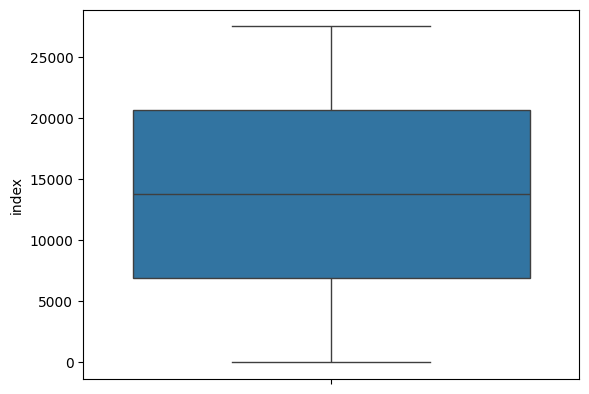

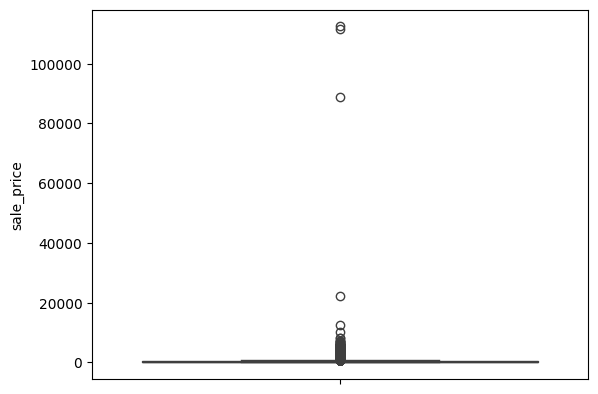

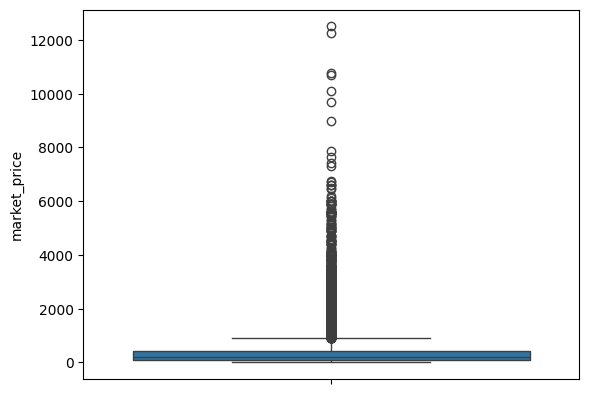

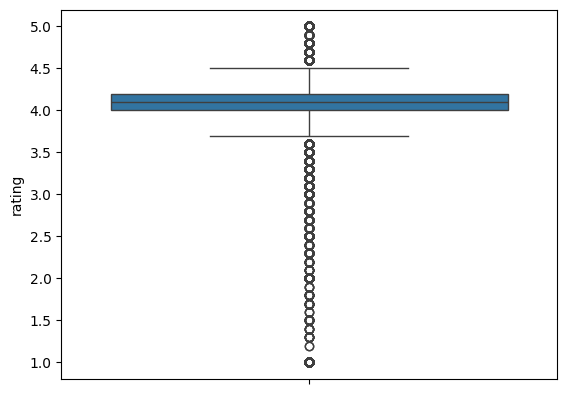

In [ ]:
for i in df.select_dtypes(include='number'):
  sns.boxplot(df[i])
  plt.show()

**Handle & Fill the outliers by Mean**

In [ ]:
columns = ['sale_price','market_price','rating']
def outliers(df,columns):
  df = df.copy()
  for col in columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr = q3-q1
    lw = q1 - 1.5*iqr
    uw = q3 + 1.5*iqr

    print(f'Lower_bound for {col}: {lw}')
    print(f'Upper_bound for {col}: {uw}')

    mean_value = df[col].mean()
    print(f'mean of {col}: {mean_value}')

    df[col] = np.where((df[col] < lw) | (df[col] > uw), mean_value, df[col])
  return df


df_new = outliers(df,columns)
df_new

Lower_bound for sale_price: -301.0
Upper_bound for sale_price: 755.0
mean of sale_price: 334.6001680275812
Lower_bound for market_price: -387.5
Upper_bound for market_price: 912.5
mean of market_price: 382.05666448920346
Lower_bound for rating: 3.6999999999999997
Upper_bound for rating: 4.5
mean of rating: 3.9924079114498277


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.100000,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,3.992408,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.992408,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.700000,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.400000,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.900000,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.000000,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.800000,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.200000,"Tetley Green Tea with its refreshing pure, ori..."


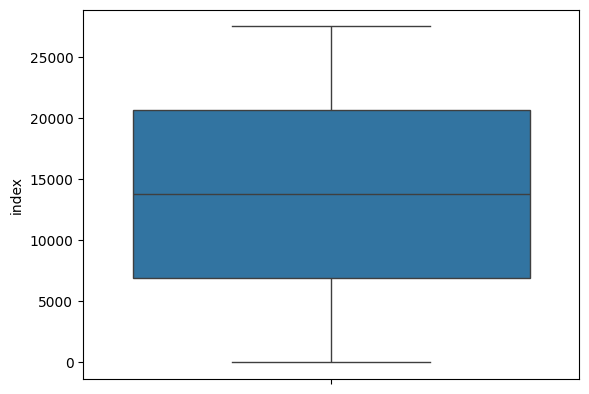

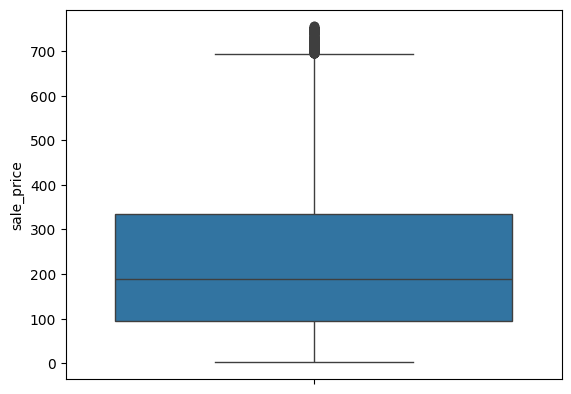

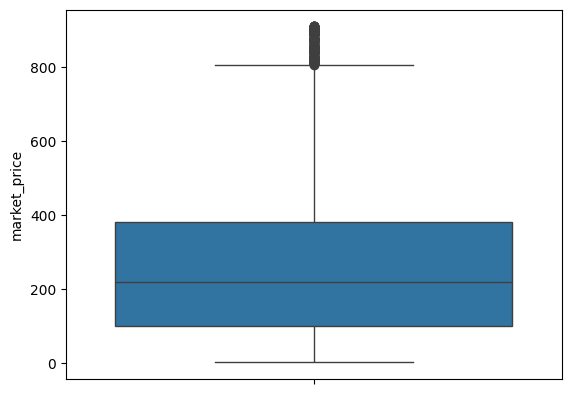

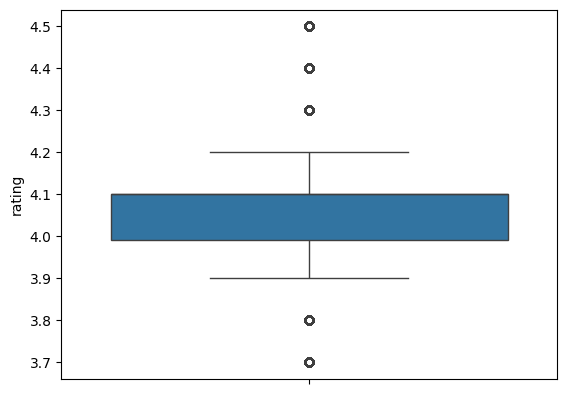

In [ ]:
for i in df_new.select_dtypes(include='number'):
  sns.boxplot(y=df_new[i])
  plt.show()

# **Analysis:**

**Task 1:--  Find out the top & least sold product**

In [ ]:
top_sold_products = df.groupby('product')['sale_price'].sum().sort_values(ascending=False).head(5)
print(top_sold_products)

product
Beard Kit                                                  112475.00
4mm Aluminium Induction Base Chapati Roti Tawa - Silver    112178.00
Balloon - Polka Dot, 12 Inch                                88899.00
Extra Virgin Olive Oil                                      24808.53
Olive Oil - Extra Virgin                                    22568.22
Name: sale_price, dtype: float64


In [ ]:
least_sold_products = df.groupby('product')['sale_price'].sum().sort_values(ascending=True).head(5)
print(least_sold_products)

product
Serum                                          3.0
Polo - The Mint With The Hole                  5.0
Orbit Sugar-Free Chewing Gum - Lemon & Lime    5.0
Sugar Coated Chocolate                         5.0
Hand Wash - Moisture Shield                    5.0
Name: sale_price, dtype: float64


**Task 2 : Measuring discount on a certain item.**


In [ ]:
df['discount_percentage'] = ((df['market_price'] - df['sale_price']) / df['market_price']) * 100

df[['product', 'market_price', 'sale_price', 'discount_percentage']].head(10)


,product,market_price,sale_price,discount_percentage
0,Garlic Oil - Vegetarian Capsule 500 mg,220.0,220.0,0.000000
1,Water Bottle - Orange,180.0,180.0,0.000000
2,"Brass Angle Deep - Plain, No.2",250.0,119.0,52.400000
3,Cereal Flip Lid Container/Storage Jar - Assort...,176.0,149.0,15.340909
4,Creme Soft Soap - For Hands & Body,162.0,162.0,0.000000
5,Germ - Removal Multipurpose Wipes,199.0,169.0,15.075377
6,Multani Mati,58.0,58.0,0.000000
7,Hand Sanitizer - 70% Alcohol Base,250.0,250.0,0.000000
8,Biotin & Collagen Volumizing Hair Shampoo + Bi...,1098.0,1098.0,0.000000
9,"Scrub Pad - Anti- Bacterial, Regular",20.0,20.0,0.000000


**Define Correlaion betwwen the numerical columns**

In [ ]:
df_4 = df[['sale_price','market_price','discount_percentage']]
df_4.corr()

,sale_price,market_price,discount_percentage
sale_price,1.000000,0.411113,-0.543381
market_price,0.411113,1.000000,0.005946
discount_percentage,-0.543381,0.005946,1.000000


<Axes: >

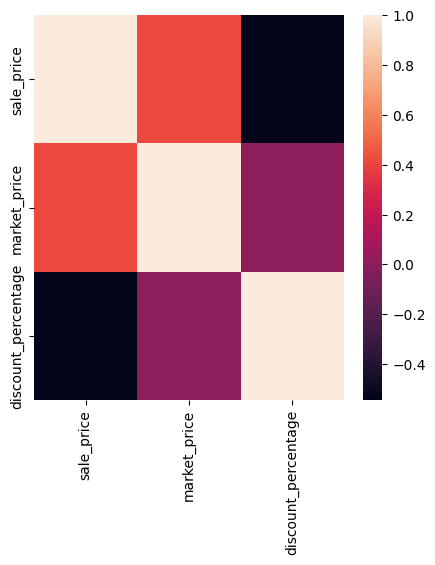

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df_4.corr())

Sale Price & Market Price (0.41) → A moderate positive correlation indicates that higher market prices generally lead to higher sale prices, but not always proportionally.

Sale Price & Discount Percentage (-0.54) → A moderate negative correlation suggests that as discounts increase, sale prices tend to decrease, which aligns with pricing strategies.

Market Price & Discount Percentage (0.006) → An almost negligible correlation implies that discounts are not strongly influenced by market prices, indicating that other factors (like promotions or demand) may play a role.

# **Visualizations the graph**

In [ ]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


**Task : Create Plots of first 5 brand with the saleprice**

Text(0.5, 1.0, 'Top 5 Selling Brands by Volume')

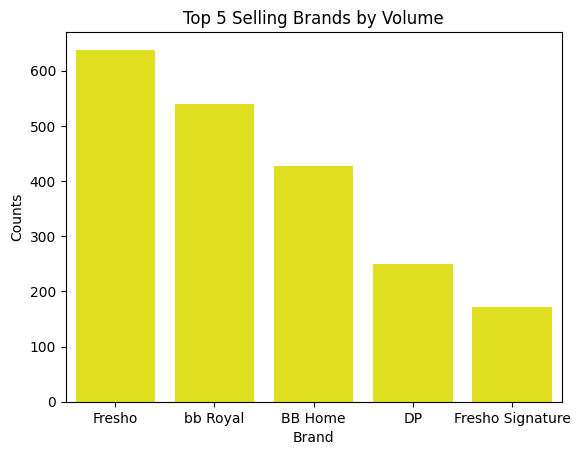

In [ ]:
counts = df['brand'].value_counts()
counts_b = pd.DataFrame({'brand': counts.index, 'Counts': counts.values})[:5]

cx = sns.barplot(x='brand', y='Counts', data=counts_b, color='Yellow')
cx.set_xlabel('Brand')
cx.set_title('Top 5 Selling Brands by Volume')

**Number of Products per Category**

In [ ]:
counts = df['category'].value_counts()
counts

,count
category,
Beauty & Hygiene,7867
Gourmet & World Food,4690
"Kitchen, Garden & Pets",3580
Snacks & Branded Foods,2814
"Foodgrains, Oil & Masala",2676
Cleaning & Household,2675
Beverages,885
"Bakery, Cakes & Dairy",851
Baby Care,610


Text(0.5, 1.0, 'No. of Products per Category')

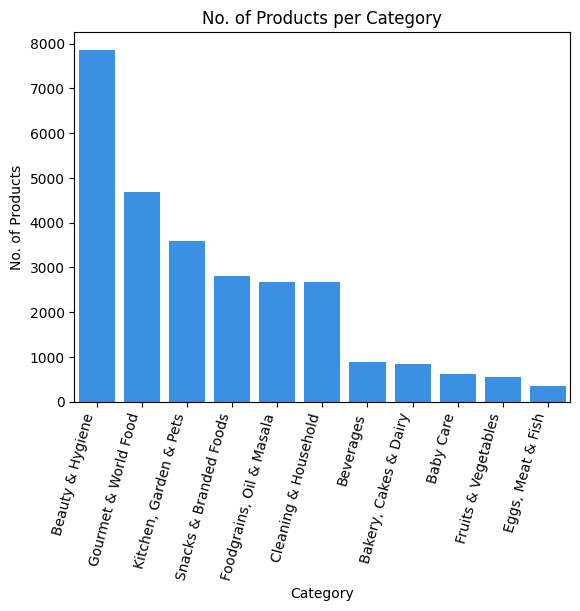

In [ ]:
counts = df['category'].value_counts()
counts_df = pd.DataFrame({'Category': counts.index, 'Counts': counts.values})

sns.barplot(x='Category', y='Counts', data=counts_df, color='dodgerblue')
plt.xticks(rotation=75, ha='right')
plt.xlabel('Category')
plt.ylabel('No. of Products')
plt.title('No. of Products per Category')

**Average rating of Top Brands.**

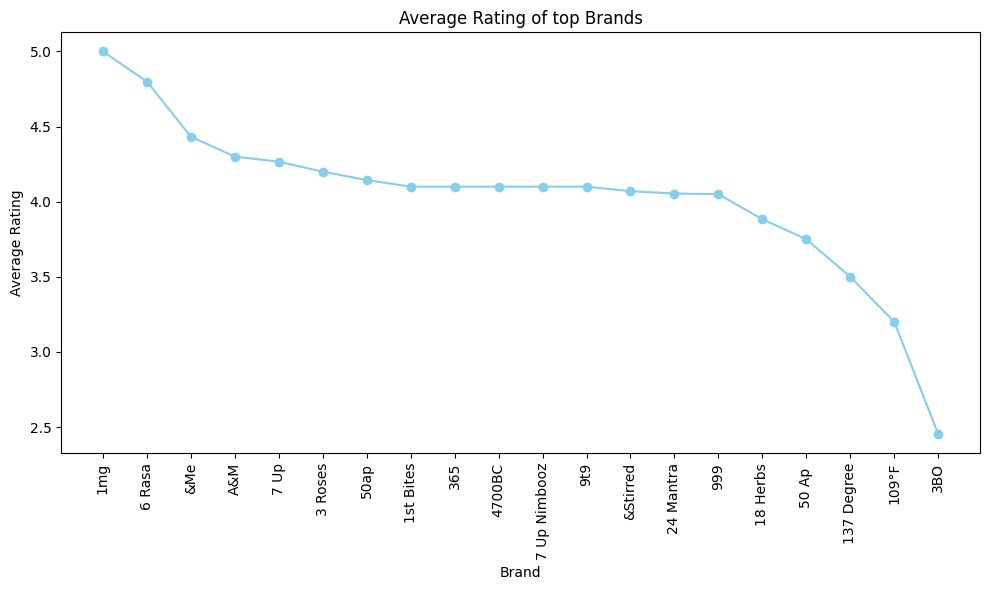

In [ ]:
brand_ratings = df.groupby('brand')['rating'].mean().reset_index().head(20)
brand_ratings_sorted = brand_ratings.sort_values(by='rating', ascending=False)

plt.figure(figsize=(10,6))
plt.plot(brand_ratings_sorted['brand'], brand_ratings_sorted['rating'], marker='o', color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.title('Average Rating of top Brands')
plt.tight_layout()
plt.show()

**Top Rating Products**

Text(0.5, 1.0, 'Top 5 Highet Rating Products')

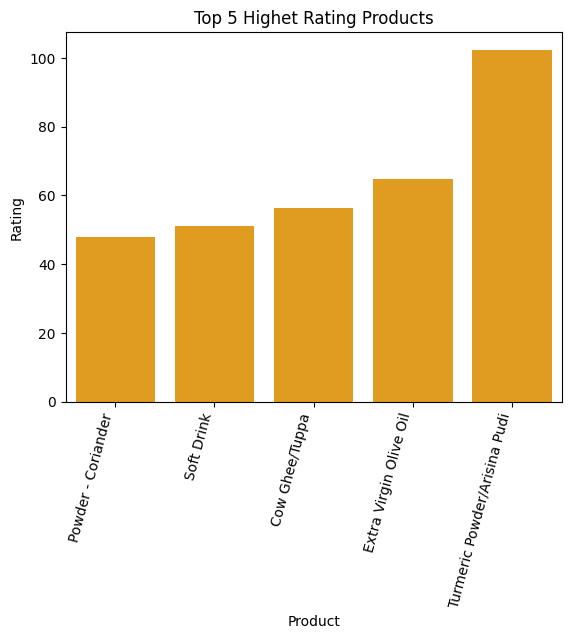

In [ ]:
top = df.groupby('product')['rating'].sum().sort_values(ascending=True)
top_b = pd.DataFrame({'Product':top.index,'Total Rating':top.values}).tail(5)

sns.barplot(x='Product', y='Total Rating', data=top_b, color='Orange')
plt.xticks(rotation=75, ha='right')
plt.xlabel('Product')
plt.ylabel('Rating')
plt.title('Top 5 Highet Rating Products')

**Least Rating Products**

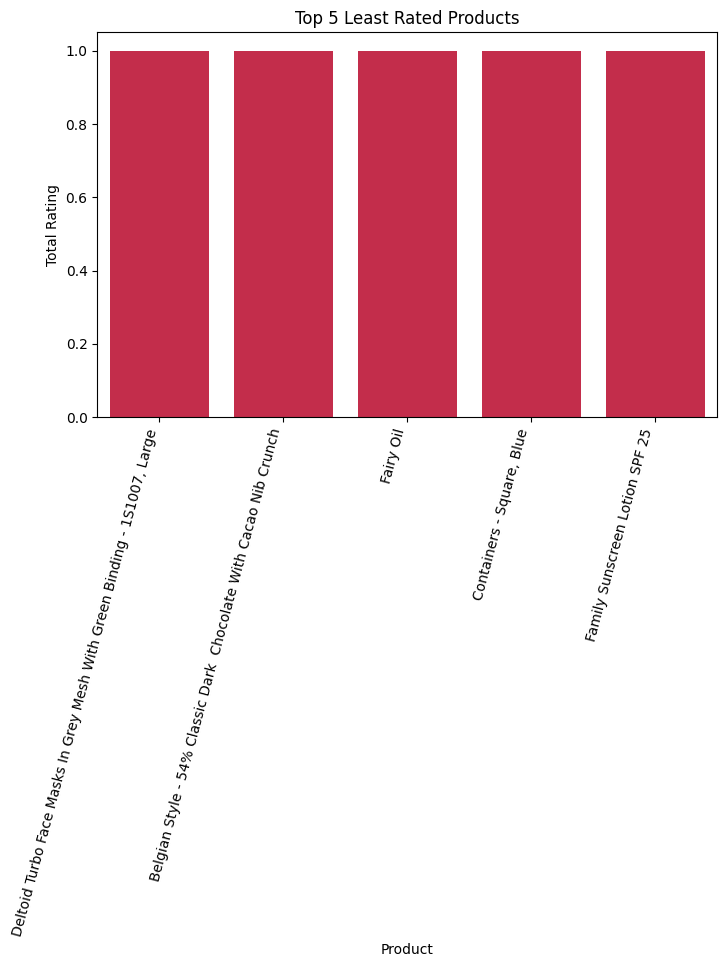

In [ ]:
least = df.groupby('product')['rating'].sum().sort_values(ascending=True)
least_b = pd.DataFrame({'Product': least.index, 'Total Rating': least.values}).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x='Product', y='Total Rating', data=least_b, color='crimson')
plt.xticks(rotation=75, ha='right')
plt.xlabel('Product')
plt.ylabel('Total Rating')
plt.title('Top 5 Least Rated Products')
plt.show()